In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'/home/labsuser'

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

import helpers_py as hf

pd.set_option('max_columns', 90)
pd.set_option('max_rows', 90)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [4]:
train_df = pd.read_csv('health care diabetes.csv')

In [5]:
train_df.shape

(768, 9)

In [6]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
train_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Exploratory Data Analysis (EDA)

## Project Task: Week 1

In [8]:
miss_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

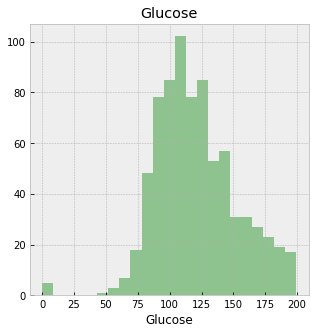

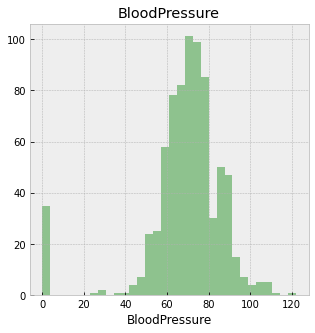

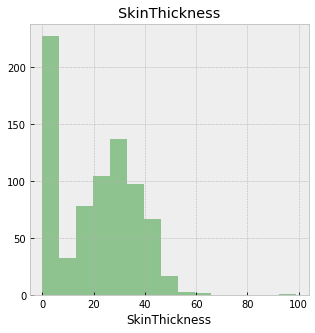

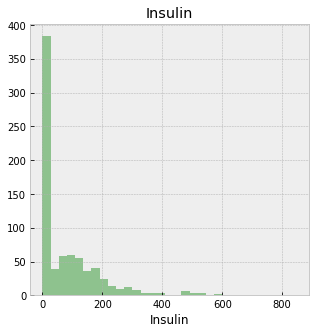

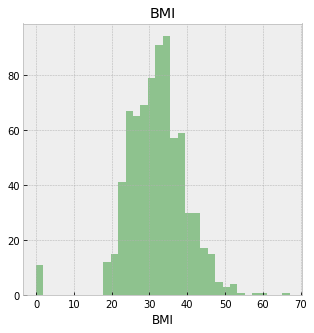

In [9]:
for col in miss_cols:
    plt.figure(figsize = (5, 5))
    plt.title(col)
    sns.distplot(train_df[col], kde = False, color = 'green')

In [10]:
train_df[['Glucose', 	'BloodPressure', 	'SkinThickness', 	'Insulin', 	'BMI']] = train_df[['Glucose', 	'BloodPressure', 	'SkinThickness', 	'Insulin', 	'BMI']].replace(0, np.nan)

In [11]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
train_df.isnull().sum()/len(train_df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [13]:
from sklearn.impute import SimpleImputer
imputed_train_df = SimpleImputer(missing_values = np.nan , strategy='most_frequent')

In [14]:
imputed_df = pd.DataFrame(imputed_train_df.fit_transform(train_df))

In [15]:
imputed_df.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,105.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,105.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.0,105.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [16]:
train_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
imputed_df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [18]:
imputed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,105.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,105.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.0,105.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


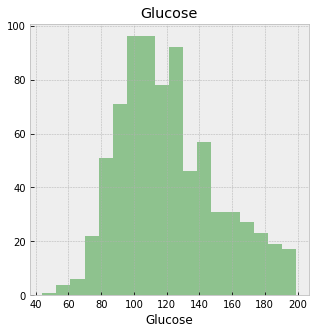

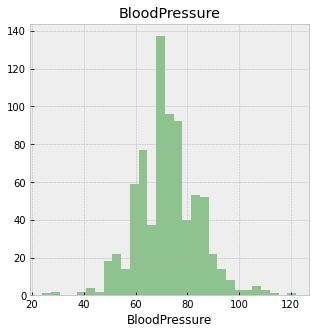

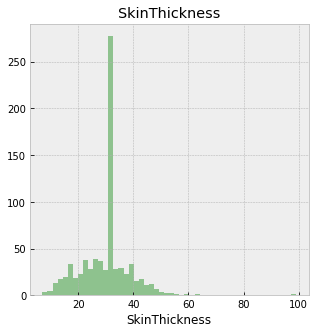

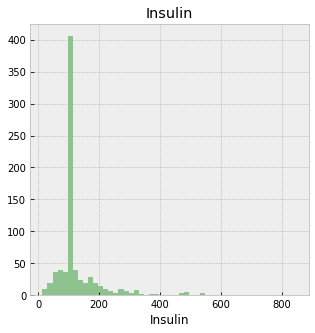

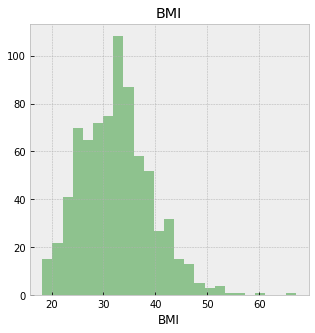

In [19]:
for col in miss_cols:
    plt.figure(figsize = (5, 5))
    plt.title(col)
    sns.distplot(imputed_df[col], kde = False, color = 'green')

In [20]:
imputed_df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

### 3. There are Integer and Float data type variables in this dataset. create a count(Frequency) plot describing the data types and the count of variables. 

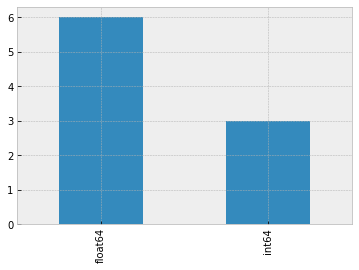

In [21]:
(train_df.dtypes).value_counts().plot(kind = 'bar')
plt.show()

## Exploratory Data Analysis (EDA) Contd....,
### Project Task: Week 2

#### 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

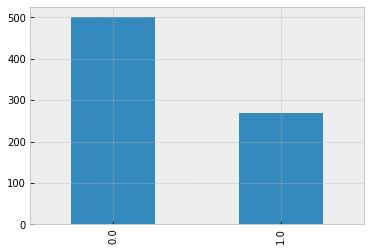

In [22]:
(imputed_df.Outcome).value_counts().plot(kind = 'bar')
plt.show()

In [23]:
imputed_df.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [24]:
round(imputed_df.Outcome.value_counts(normalize = True)*100, 2)

0.0    65.1
1.0    34.9
Name: Outcome, dtype: float64

### This is a slightly imbalanced dataset with majority "Negative Class". We will create a balanced dataset using sampling Techniques

### 2. Create Scatter charts between the pair of variables to understand the relationships. Describe your findings.

In [25]:
imputed_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129186,0.208925,0.104428,0.005204,0.021546,-0.033523,0.544341,0.221898
Glucose,0.129186,1.000000,0.220825,0.196269,0.413218,0.230762,0.138156,0.267969,0.491524
BloodPressure,0.208925,0.220825,1.000000,0.206391,0.029776,0.281276,-0.000478,0.326264,0.163875
SkinThickness,0.104428,0.196269,0.206391,1.000000,0.120690,0.522159,0.077395,0.158825,0.220678
Insulin,0.005204,0.413218,0.029776,0.120690,1.000000,0.186087,0.141959,0.070669,0.193850
BMI,0.021546,0.230762,0.281276,0.522159,0.186087,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.138156,-0.000478,0.077395,0.141959,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.267969,0.326264,0.158825,0.070669,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.491524,0.163875,0.220678,0.193850,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

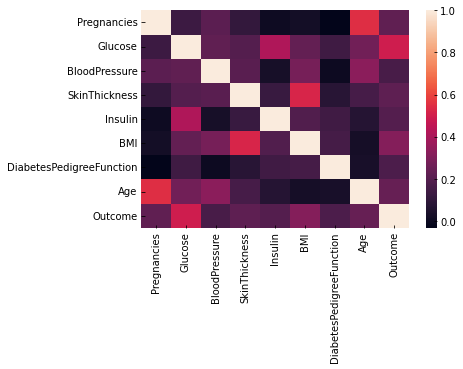

In [26]:
sns.heatmap(imputed_df.corr())

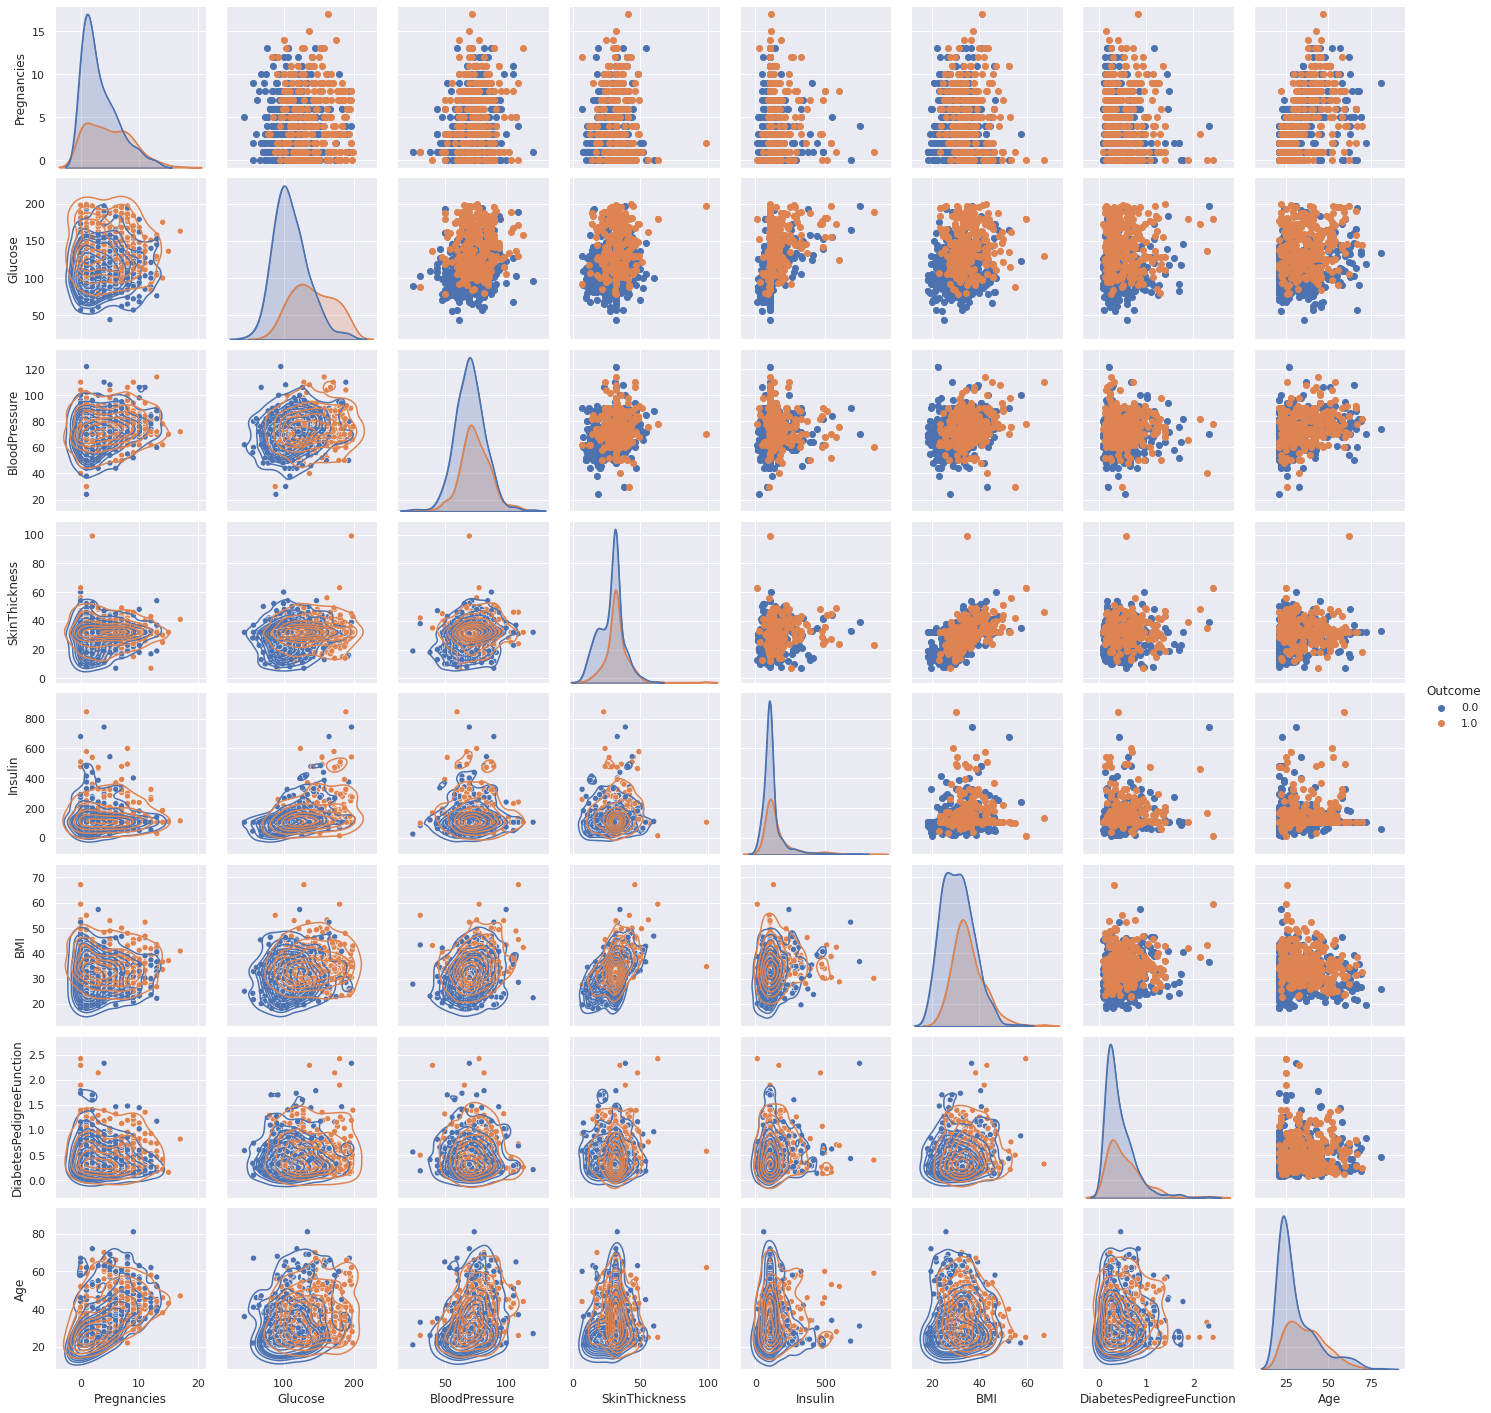

In [27]:
sns.set()
g = sns.pairplot(imputed_df, hue = 'Outcome')
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)
plt.show()

#### This pairsplot shows the extent and direction of correlation between variables as well as the spread of the data for each pair, distinguishing them by the "Outcome"

## 3. Perform correlation analysis. Visually explore it using a heatmap.

In [28]:
round(imputed_df.corr()['Outcome'][:], 3).sort_values(ascending = False)

Outcome                     1.000
Glucose                     0.492
BMI                         0.312
Age                         0.238
Pregnancies                 0.222
SkinThickness               0.221
Insulin                     0.194
DiabetesPedigreeFunction    0.174
BloodPressure               0.164
Name: Outcome, dtype: float64

In [29]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < -0.1:
    color = 'red'
  elif value > 0.1:
    color = 'green'
  else:
    color = 'white'

  return 'color: %s' % color

In [30]:
round(imputed_df.corr(), 3).style.applymap(color_negative_red)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129000,0.209000,0.104000,0.005000,0.022000,-0.034000,0.544000,0.222000
Glucose,0.129000,1.000000,0.221000,0.196000,0.413000,0.231000,0.138000,0.268000,0.492000
BloodPressure,0.209000,0.221000,1.000000,0.206000,0.030000,0.281000,-0.000000,0.326000,0.164000
SkinThickness,0.104000,0.196000,0.206000,1.000000,0.121000,0.522000,0.077000,0.159000,0.221000
Insulin,0.005000,0.413000,0.030000,0.121000,1.000000,0.186000,0.142000,0.071000,0.194000
BMI,0.022000,0.231000,0.281000,0.522000,0.186000,1.000000,0.154000,0.026000,0.312000
DiabetesPedigreeFunction,-0.034000,0.138000,-0.000000,0.077000,0.142000,0.154000,1.000000,0.034000,0.174000
Age,0.544000,0.268000,0.326000,0.159000,0.071000,0.026000,0.034000,1.000000,0.238000
Outcome,0.222000,0.492000,0.164000,0.221000,0.194000,0.312000,0.174000,0.238000,1.000000


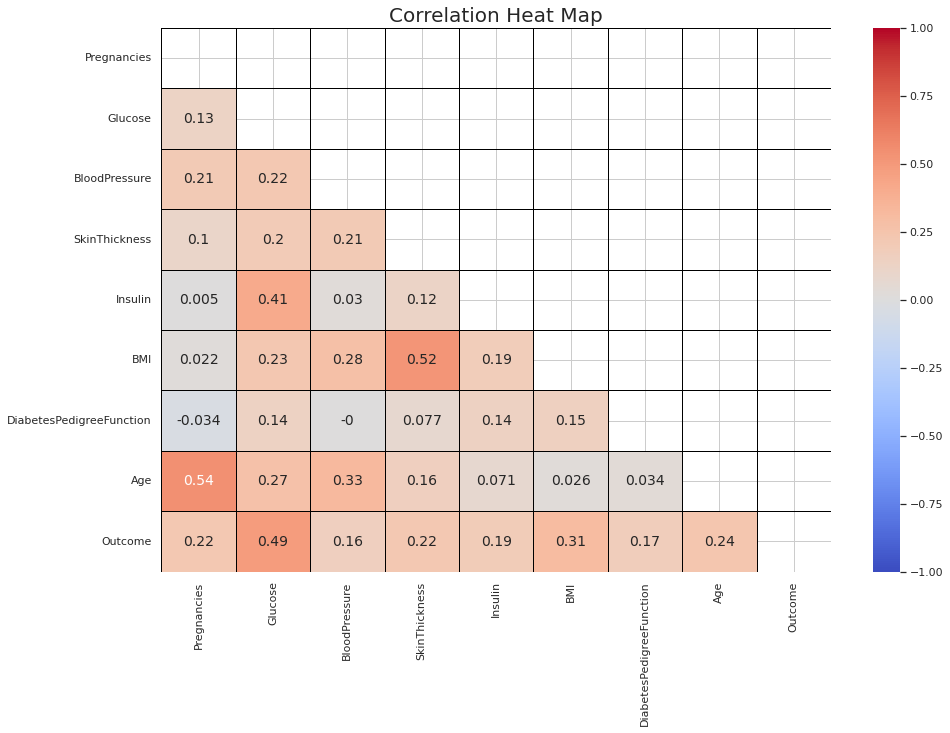

In [31]:
sns.set_style("whitegrid")

corr = train_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#kot = corr[corr>=.6]
plt.figure(figsize=(15,10))
sns.heatmap(round(imputed_df.corr(), 3), cmap="coolwarm", vmin=-1, vmax=1, annot = True, mask = mask, linewidths=1, linecolor='black', annot_kws={"fontsize":14}).set_title('Correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

### From the HeatMap, we can see that Majority of the correlations are "Positive", but weak. Strongest correlated pairs are
"BMI : Skin Thickness", "Age : Pregnancies", "Glucose : Outcome(Target Variable)",
"Insulin : Glucose"

## Data Modeling

In [32]:
imputed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,105.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,105.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.0,105.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


### Since our variables are on different scale and not distributed in Gaussian form, I chose to scale the data using MinMaxScaler, for better performance of the model.

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [34]:
imputed_df_scaled = scaler.fit_transform(imputed_df)

In [35]:
imputed_df_scaled = pd.DataFrame(imputed_df_scaled, columns=imputed_df.columns)

In [36]:
imputed_df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.109375,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.109375,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.271739,0.109375,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


###  Started with Logistic Regression, without sampling the data, but got a poor recall score

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
imputed_df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.109375,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.109375,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.271739,0.109375,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [39]:
y = imputed_df_scaled['Outcome']
x = imputed_df_scaled.drop('Outcome', axis = 1)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

In [41]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
253,0.000000,0.270968,0.448980,0.271739,0.109375,0.359918,0.068318,0.066667
389,0.176471,0.361290,0.448980,0.173913,0.080529,0.274029,0.371904,0.116667
612,0.411765,0.800000,0.653061,0.380435,0.368990,0.408998,0.302733,0.316667
31,0.176471,0.735484,0.530612,0.315217,0.277644,0.274029,0.330060,0.116667
644,0.176471,0.380645,0.489796,0.250000,0.165865,0.192229,0.278395,0.100000


In [42]:
y_train.head()

253    0.0
389    0.0
612    1.0
31     1.0
644    0.0
Name: Outcome, dtype: float64

In [43]:
lr = LogisticRegression()

In [44]:
lr.fit(x_train, y_train)

LogisticRegression()

In [45]:
pred = lr.predict(x_test)

In [46]:
cnf_matrix = confusion_matrix(y_test, pred)

In [47]:
cnf_matrix

array([[89, 11],
       [28, 26]])

In [48]:
def sens_spec(cnf_matrix):

    total_cm = sum(sum(cnf_matrix))

    accuracy_clf = (cnf_matrix[0,0] + cnf_matrix[1,1]) / total_cm

    sensitivity_clf = cnf_matrix[0,0] / (cnf_matrix[0, 0] + cnf_matrix[0, 1])

    specificity_clf = cnf_matrix[1,1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    
    #print('accuracy of {} is {}'.format(accurac)
    return('Accuracy: {}'.format(round(accuracy_clf, 2)), 'Sensitivity: {}'.format(round(sensitivity_clf, 2)), 'Specificity: {}'.format(round(specificity_clf, 2)))

In [49]:
# Use score method to get accuracy of model
score = lr.score(x_test, y_test)
print(score)

0.7467532467532467


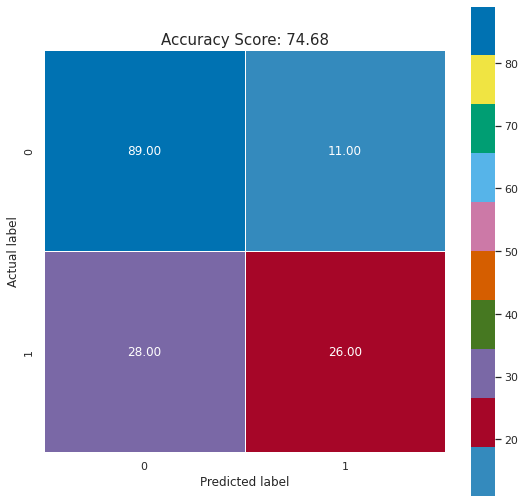

In [50]:
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = color_pal);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score*100, 2))
plt.title(all_sample_title, size = 15);

In [97]:
print(sens_spec(cnf_matrix))
print()
print(classification_report(y_test, pred))

('Accuracy: 0.77', 'Sensitivity: 0.93', 'Specificity: 0.46')

              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84       100
         1.0       0.78      0.46      0.58        54

    accuracy                           0.77       154
   macro avg       0.77      0.70      0.71       154
weighted avg       0.77      0.77      0.75       154



### Also, we know that Our classes are imbalanced, So I have used "SMOTE" sampling to balance the classes, to improve recall score.

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
os = SMOTE(random_state=0)

In [100]:
columns = x_train.columns

In [101]:
os_data_X,os_data_y=os.fit_resample(x,y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Outcome'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of NEGATIVE in oversampled data",len(os_data_y[os_data_y['Outcome']==0]))
print("Number of POSITIVE",len(os_data_y[os_data_y['Outcome']==1]))
print("Proportion of NEGATIVE data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==0])/len(os_data_X))
print("Proportion of POSITIVE data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==1])/len(os_data_X))

length of oversampled data is  1000
Number of NEGATIVE in oversampled data 500
Number of POSITIVE 500
Proportion of NEGATIVE data in oversampled data is  0.5
Proportion of POSITIVE data in oversampled data is  0.5


In [102]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X,os_data_y, test_size=0.2, random_state=0)

## Data Modeling

### Project Task: Week 4

In [103]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [104]:

import scikitplot as skplt



In [105]:
names = ["Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

classifier:  Nearest Neighbors
83.0
('Accuracy: 0.77', 'Sensitivity: 0.93', 'Specificity: 0.46')

              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83       105
         1.0       0.80      0.85      0.83        95

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200




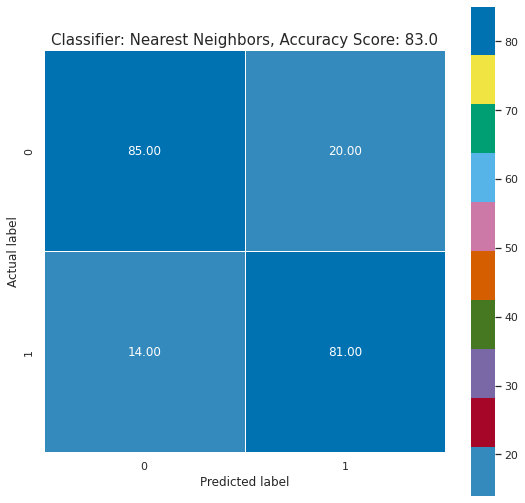

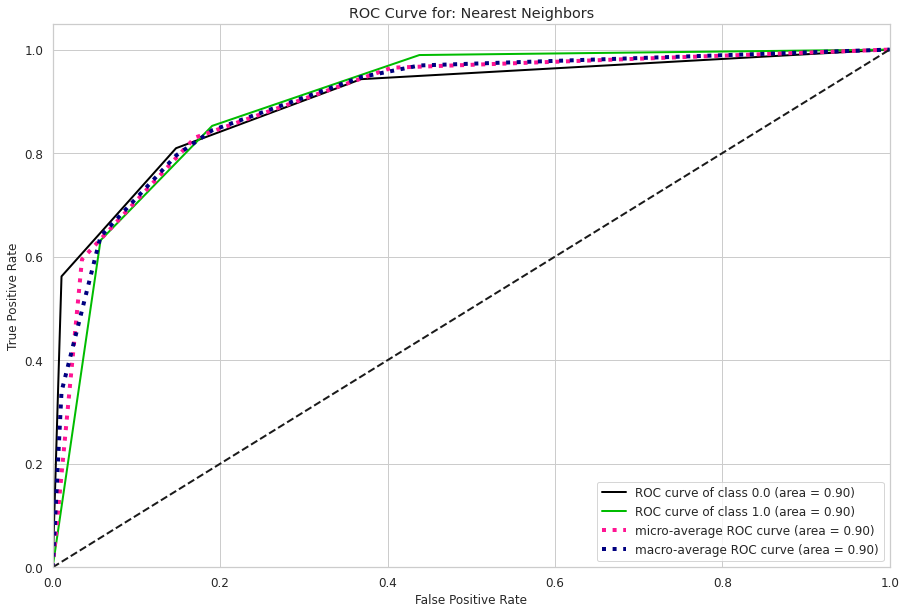

_____________________________________________________________________________________

classifier:  Logistic Regression
77.0
('Accuracy: 0.83', 'Sensitivity: 0.81', 'Specificity: 0.85')

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78       105
         1.0       0.76      0.75      0.76        95

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200




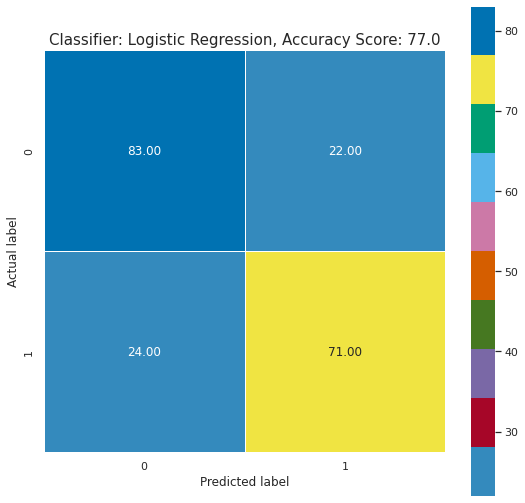

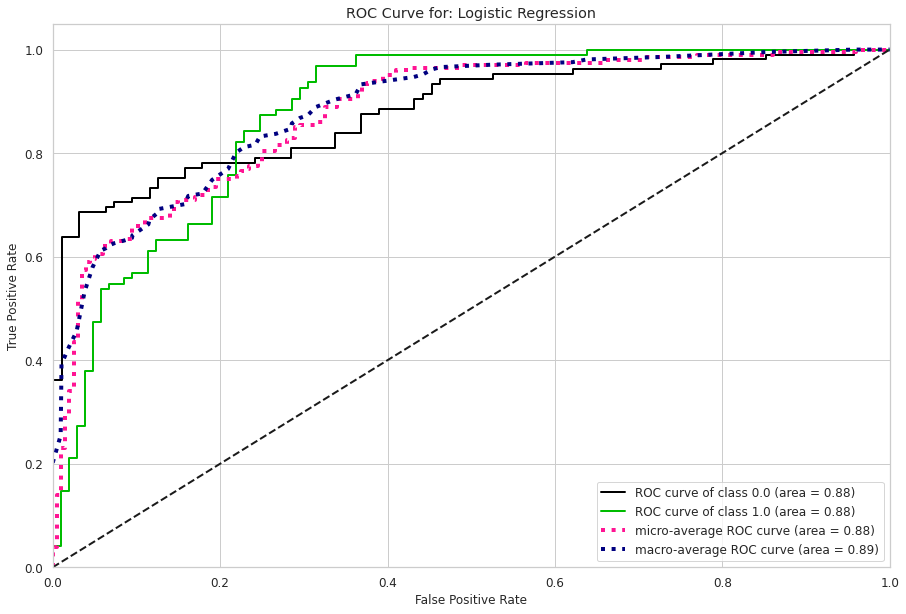

_____________________________________________________________________________________

classifier:  Linear SVM
75.0
('Accuracy: 0.77', 'Sensitivity: 0.79', 'Specificity: 0.75')

              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77       105
         1.0       0.76      0.68      0.72        95

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200




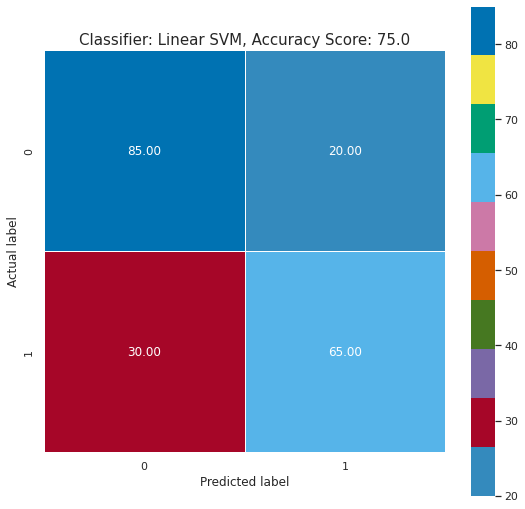

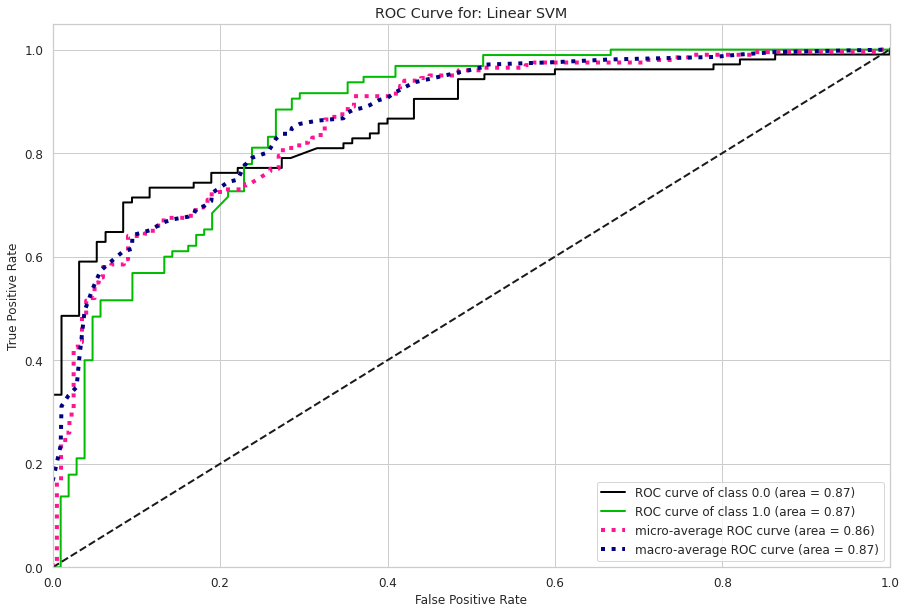

_____________________________________________________________________________________

classifier:  RBF SVM
84.0
('Accuracy: 0.75', 'Sensitivity: 0.81', 'Specificity: 0.68')

              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84       105
         1.0       0.80      0.88      0.84        95

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200




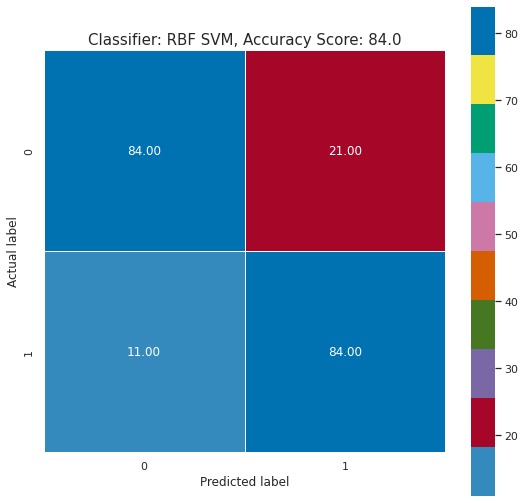

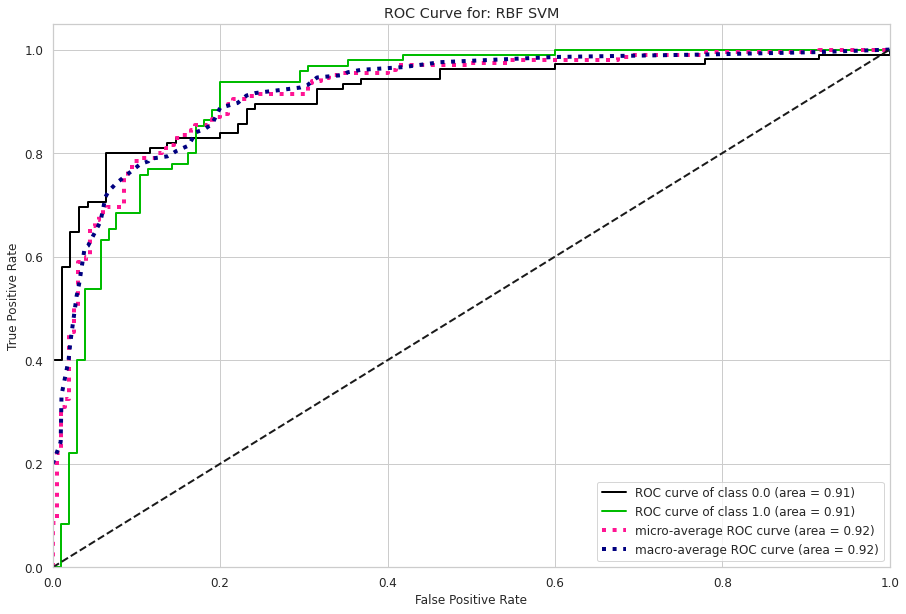

_____________________________________________________________________________________

classifier:  Gaussian Process
85.0
('Accuracy: 0.84', 'Sensitivity: 0.8', 'Specificity: 0.88')

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85       105
         1.0       0.82      0.88      0.85        95

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200




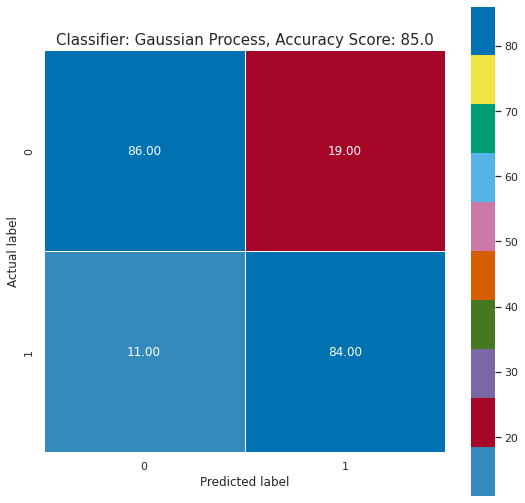

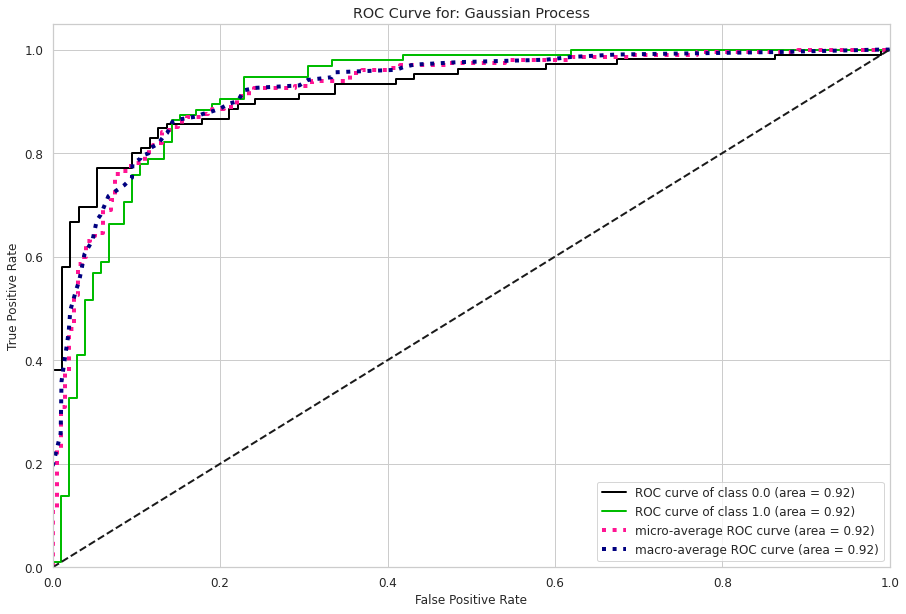

_____________________________________________________________________________________

classifier:  Decision Tree
79.5
('Accuracy: 0.85', 'Sensitivity: 0.82', 'Specificity: 0.88')

              precision    recall  f1-score   support

         0.0       0.83      0.76      0.80       105
         1.0       0.76      0.83      0.79        95

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200




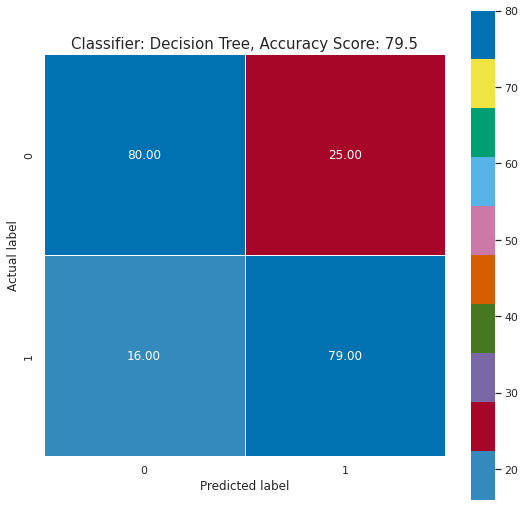

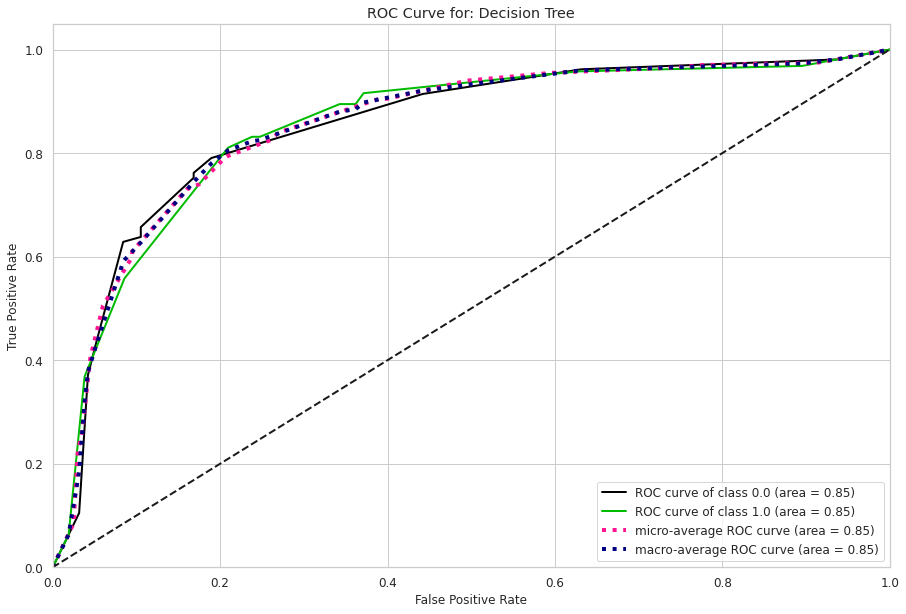

_____________________________________________________________________________________

classifier:  Random Forest
83.0
('Accuracy: 0.8', 'Sensitivity: 0.76', 'Specificity: 0.83')

              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83       105
         1.0       0.78      0.89      0.83        95

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200




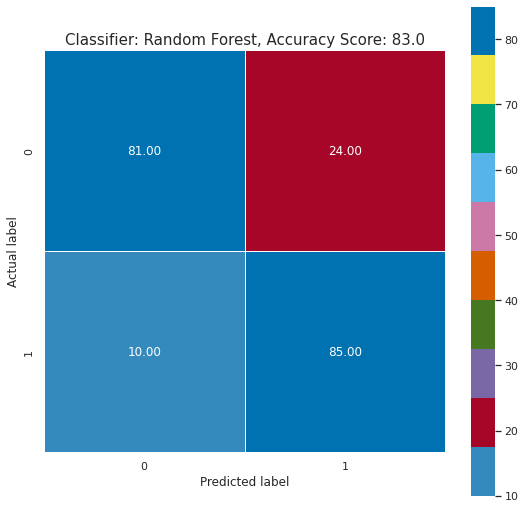

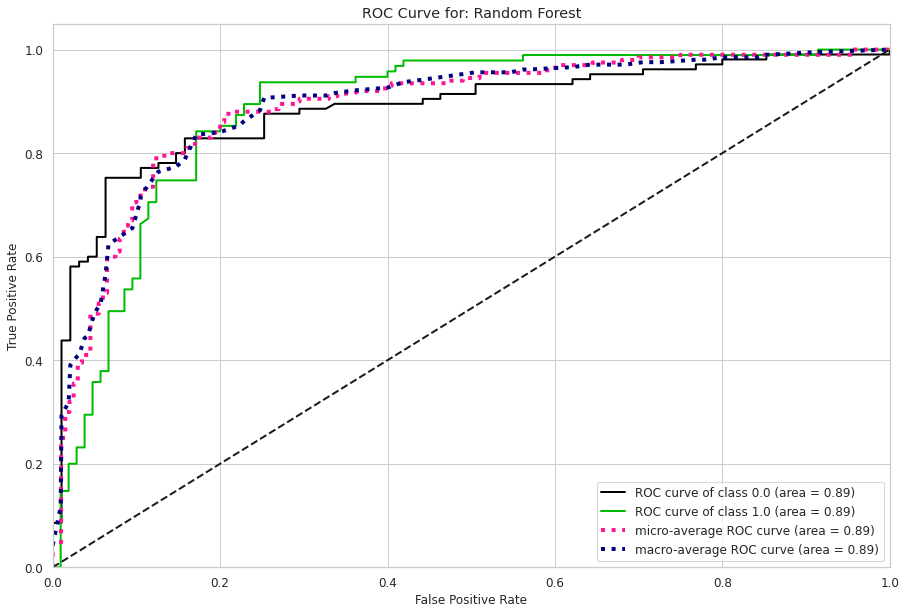

_____________________________________________________________________________________

classifier:  Neural Net
79.0
('Accuracy: 0.83', 'Sensitivity: 0.77', 'Specificity: 0.89')

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       105
         1.0       0.77      0.79      0.78        95

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200




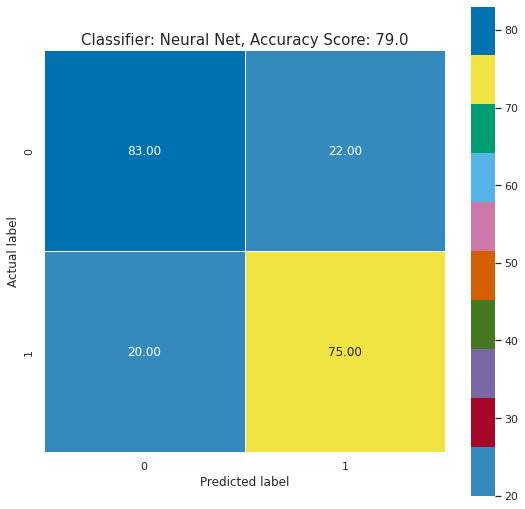

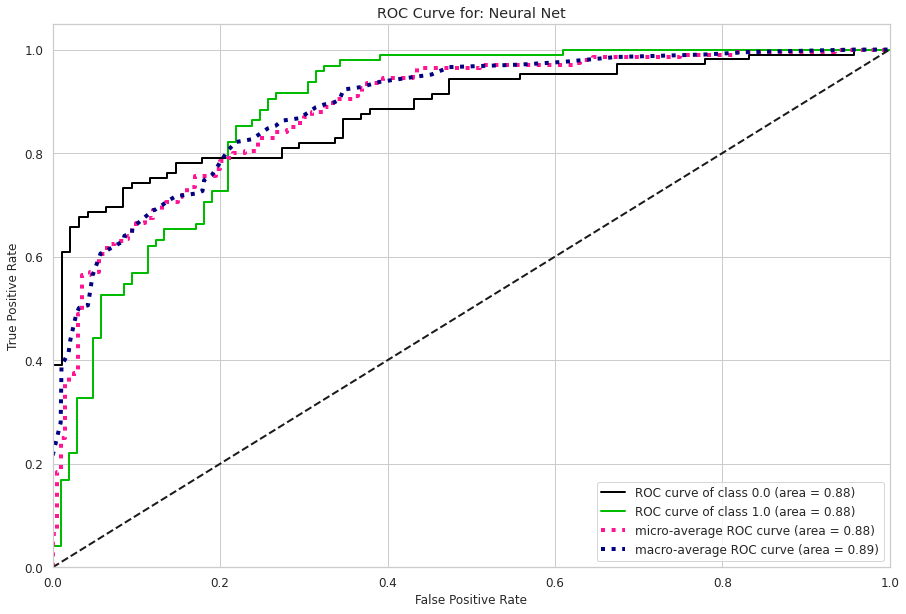

_____________________________________________________________________________________

classifier:  AdaBoost
82.5
('Accuracy: 0.79', 'Sensitivity: 0.79', 'Specificity: 0.79')

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83       105
         1.0       0.79      0.85      0.82        95

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200




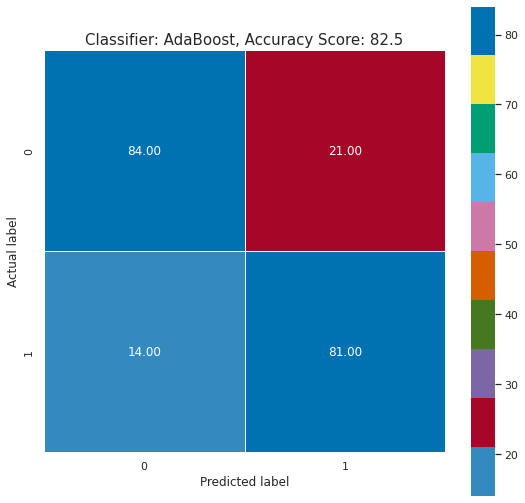

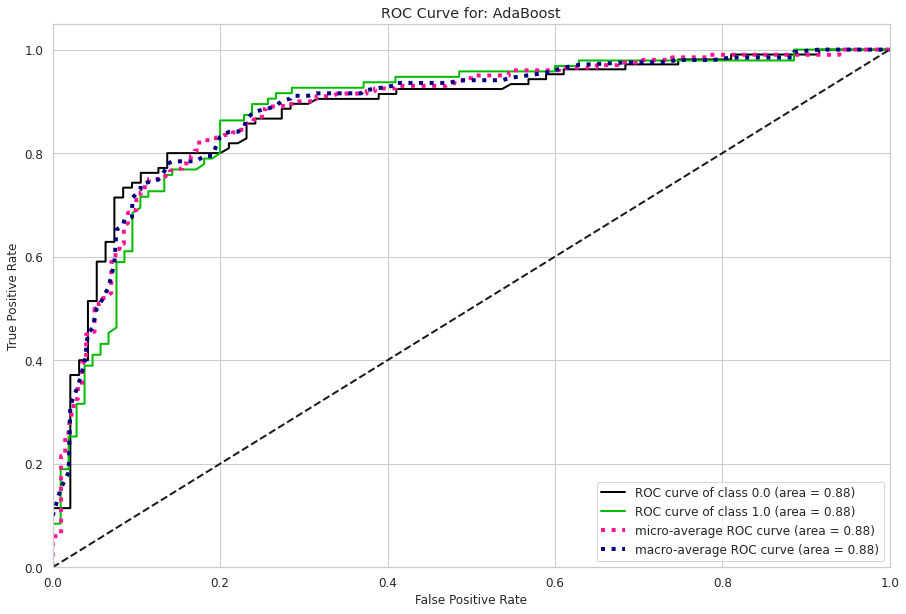

_____________________________________________________________________________________

classifier:  Naive Bayes
76.0
('Accuracy: 0.82', 'Sensitivity: 0.8', 'Specificity: 0.85')

              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78       105
         1.0       0.77      0.71      0.74        95

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200




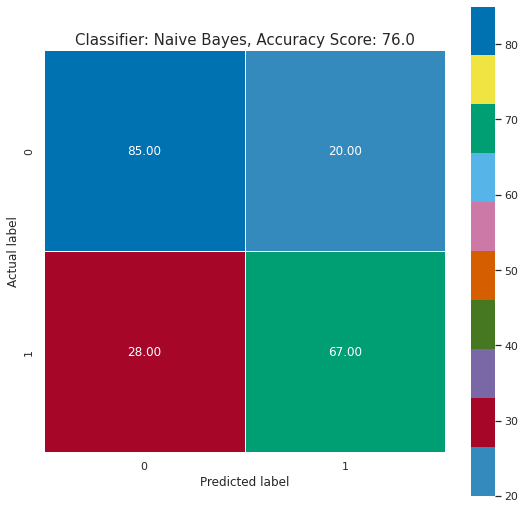

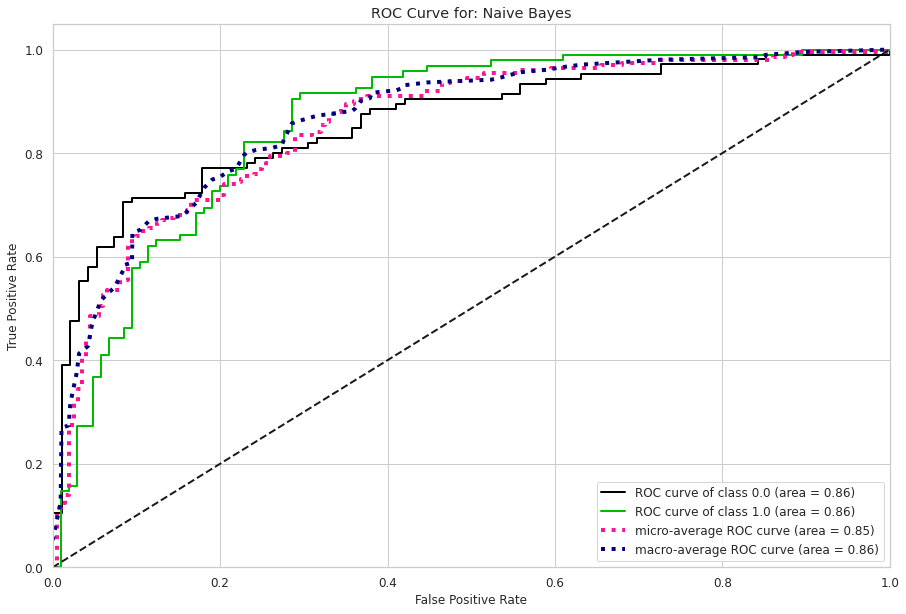

_____________________________________________________________________________________

classifier:  QDA
76.0
('Accuracy: 0.76', 'Sensitivity: 0.81', 'Specificity: 0.71')

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       105
         1.0       0.78      0.69      0.73        95

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200




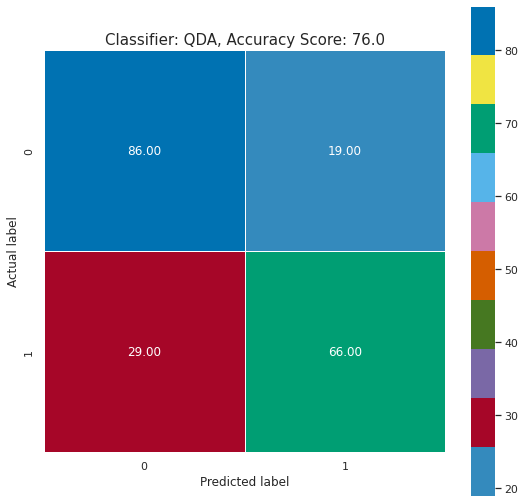

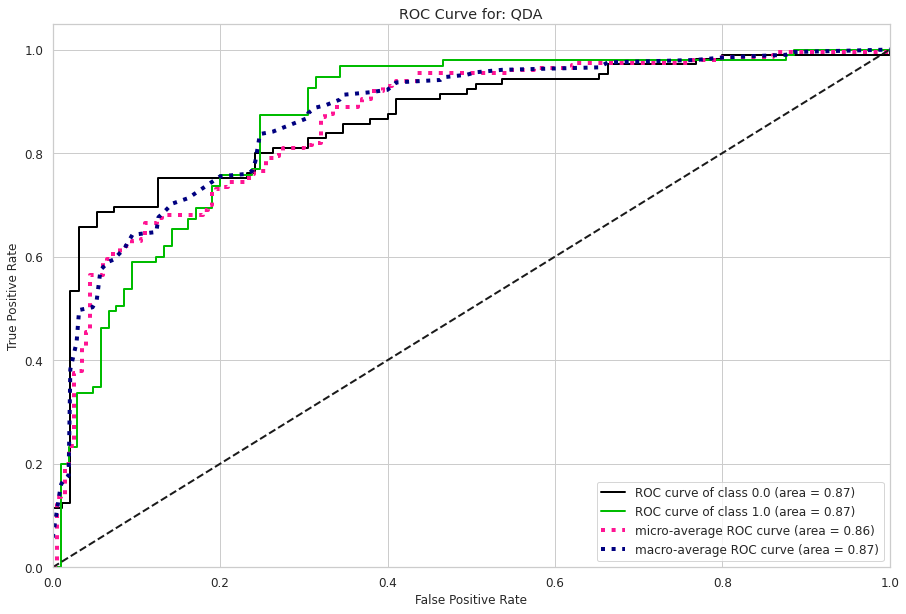

_____________________________________________________________________________________



In [106]:
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        print('classifier: ', name)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        pred = clf.predict(X_test)
        prob = clf.predict_proba(X_test)
        print(round(score*100, 2))
        print(sens_spec(cnf_matrix))
        print()
        
        cnf_matrix = confusion_matrix(y_test, pred)
        plt.figure(figsize=(9,9))
        sns.heatmap(cnf_matrix, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = color_pal);
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        #all_sample_title = 'Accuracy Score: {0}'.format(round(score*100, 2))
        all_sample_title ='Classifier: {}, Accuracy Score: {}'.format(name, round(score*100, 2))
        plt.title(all_sample_title, size = 15);

        #print()
        print(classification_report(y_test, pred))
        print()

        skplt.metrics.plot_roc_curve(y_test, prob, figsize = (15, 10), title = 'ROC Curve for: {}'.format(name))
        plt.show()
        print('_____________________________________________________________________________________')
        print()

### Let's Check how close our algorithm is predicting, by passing the inputs from our test set and compare them to the target values.

In [107]:
#import random
np.random.seed(1000)
randomlist = []
for i in range(0,10):
    n = np.random.randint(1,len(X_test))
    randomlist.append(n)
print(randomlist)

[180, 88, 72, 193, 95, 93, 2, 190, 129, 90]


In [108]:
list(X_test.iloc[180])

[0.058823529411764705,
 0.3161290322580645,
 0.4693877551020407,
 0.2608695652173913,
 0.109375,
 0.24948875255623731,
 0.10119555935098205,
 0.033333333333333326]

In [109]:
y_test.iloc[180]['Outcome']

0.0

In [110]:
pre_out = []
out = []

for i in randomlist:
    data_in = [list(X_test.iloc[i])]
    data_in = np.around(data_in, 2)
    pre_data_out = lr.predict(data_in)
    data_out = y_test.iloc[i]['Outcome']
    
    mylist = [i, data_in, pre_data_out, data_out]
    print(*mylist,sep='\n')
    print('------------------------')
    
    pre_out.append(pre_data_out)
    out.append(data_out)
    


180
[[0.06 0.32 0.47 0.26 0.11 0.25 0.1  0.03]]
[0.]
0.0
------------------------
88
[[0.12 0.24 0.49 0.09 0.07 0.24 0.2  0.07]]
[0.]
0.0
------------------------
72
[[0.65 0.49 0.57 0.33 0.16 0.49 0.3  0.45]]
[1.]
1.0
------------------------
193
[[0.29 0.46 0.51 0.27 0.11 0.15 0.05 0.15]]
[0.]
0.0
------------------------
95
[[0.   0.59 0.45 0.38 0.28 0.49 0.12 0.05]]
[0.]
1.0
------------------------
93
[[0.12 0.41 0.39 0.03 0.32 0.15 0.34 0.02]]
[0.]
0.0
------------------------
2
[[0.82 0.36 0.55 0.2  0.2  0.38 0.14 0.42]]
[0.]
1.0
------------------------
190
[[0.52 0.46 0.57 0.27 0.18 0.32 0.08 0.26]]
[0.]
1.0
------------------------
129
[[0.   0.7  0.59 0.35 0.31 0.48 0.08 0.1 ]]
[1.]
0.0
------------------------
90
[[0.   0.3  0.45 0.27 0.24 0.44 0.13 0.07]]
[0.]
0.0
------------------------


In [111]:
svc = SVC(gamma=2, C=1, probability=True)
svc.fit(X_train, y_train)

SVC(C=1, gamma=2, probability=True)

In [112]:
pre_out = []
out = []

for i in randomlist:
    data_in = [list(X_test.iloc[i])]
    data_in = np.around(data_in, 2)
    pre_data_out = svc.predict(data_in)
    data_out = y_test.iloc[i]['Outcome']
    
    mylist = [i, data_in, pre_data_out, data_out]
    print(*mylist,sep='\n')
    print('------------------------')
    
    pre_out.append(pre_data_out)
    out.append(data_out)
    


180
[[0.06 0.32 0.47 0.26 0.11 0.25 0.1  0.03]]
[0.]
0.0
------------------------
88
[[0.12 0.24 0.49 0.09 0.07 0.24 0.2  0.07]]
[0.]
0.0
------------------------
72
[[0.65 0.49 0.57 0.33 0.16 0.49 0.3  0.45]]
[1.]
1.0
------------------------
193
[[0.29 0.46 0.51 0.27 0.11 0.15 0.05 0.15]]
[0.]
0.0
------------------------
95
[[0.   0.59 0.45 0.38 0.28 0.49 0.12 0.05]]
[1.]
1.0
------------------------
93
[[0.12 0.41 0.39 0.03 0.32 0.15 0.34 0.02]]
[0.]
0.0
------------------------
2
[[0.82 0.36 0.55 0.2  0.2  0.38 0.14 0.42]]
[1.]
1.0
------------------------
190
[[0.52 0.46 0.57 0.27 0.18 0.32 0.08 0.26]]
[1.]
1.0
------------------------
129
[[0.   0.7  0.59 0.35 0.31 0.48 0.08 0.1 ]]
[1.]
0.0
------------------------
90
[[0.   0.3  0.45 0.27 0.24 0.44 0.13 0.07]]
[0.]
0.0
------------------------


#### Our Basic Logistic Regression algorithm is predicting 7 / 10 inputs correctly,

whereas the best performing SVC algorithm is predicting 9 / 10 inputs correctly